In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

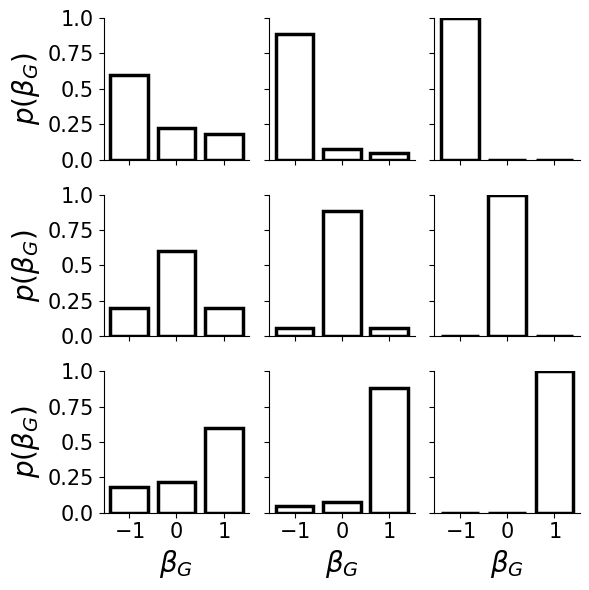

In [48]:
prior_betaB_low = np.array([0.7, 0.2, 0.1])
prior_betaB_medium = np.array([0.15, 0.7, 0.15])
prior_betaB_high = np.array([0.1, 0.2, 0.7])

trust_dist_dict = {
    "low": prior_betaB_low,
    "medium": prior_betaB_medium,
    "high": prior_betaB_high,
}
n_trusts = len(trust_dist_dict)

certainty_dict = {
    'uncertain': 2,
    'certain': 5,
    'immutable': 100
}

certainty_colors = {
    'uncertain': 'limegreen',
    'certain': 'gold',
    'immutable': 'orchid'
}

n_certainties = len(certainty_dict)

# Plot barplot of each trust distribution for each certainty

fig, axes = plt.subplots(nrows=n_trusts, ncols=n_certainties, figsize=(n_certainties * 2, n_trusts * 2), sharex=True, sharey=True)

for i, (trust_name, trust_dist) in enumerate(trust_dist_dict.items()):
    for j, (certainty_name, certainty) in enumerate(certainty_dict.items()):
        # Plot barplot
        ax = axes[i, j]

        softmax_dist = np.exp(trust_dist * certainty) / np.sum(np.exp(trust_dist * certainty))  

        # Make bars transparent with a black edge
        bars = ax.bar(np.arange(len(trust_dist)), softmax_dist, edgecolor='black', linewidth=2.5, facecolor=(0, 0, 0, 0),)
 
        ax.set_xticks(np.arange(len(trust_dist)))
        ax.set_yticks(np.arange(0, 1.1, 0.25))
        ax.set_yticklabels(np.arange(0, 1.1, 0.25), fontsize=15)
        ax.set_xticklabels(['$-1$', '$0$', '$1$'], fontsize=15)
        #ax.set_title(f'Trust: {trust_name}, Certainty: {certainty_name}')
        ax.set_ylim(0, 1)
        if j == 0:
            ax.set_ylabel('$p(\\beta_G)$', fontsize=20)

        if i == n_trusts - 1:
            ax.set_xlabel('$\\beta_G$', fontsize=20)
        #if i == 0:
        #    ax.set_title(certainty_name.replace('_', ' ').capitalize())

#axes = axes.T
plt.tight_layout()
sns.despine()


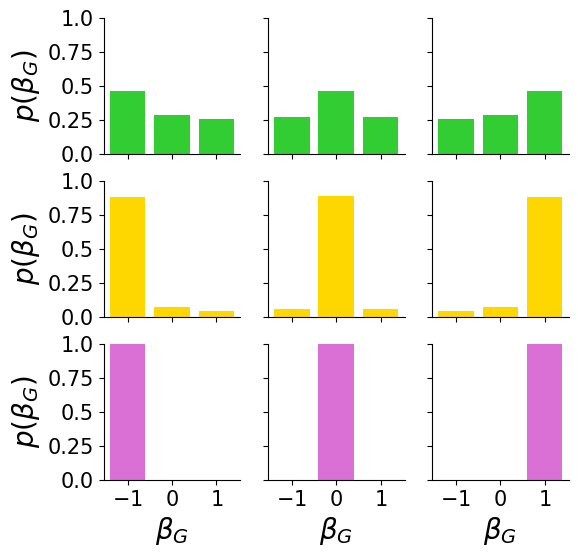

In [50]:
# Same as above but certainty are rows and trusts are columns
certainty_dict = {
    'uncertain': 1,
    'certain': 5,
    'immutable': 100
}

fig, axes = plt.subplots(nrows=n_certainties, ncols=n_trusts, figsize=(n_trusts * 2, n_certainties * 2), sharex=True, sharey=True)

for i, (certainty_name, certainty) in enumerate(certainty_dict.items()):
    for j, (trust_name, trust_dist) in enumerate(trust_dist_dict.items()):
        # Plot barplot
        ax = axes[i, j]

        softmax_dist = np.exp(trust_dist * certainty) / np.sum(np.exp(trust_dist * certainty))  

        ax.bar(np.arange(len(trust_dist)), softmax_dist, color=certainty_colors[certainty_name])
        ax.set_xticks(np.arange(len(trust_dist)))
        ax.set_yticks(np.arange(0, 1.1, 0.25))
        ax.set_yticklabels(np.arange(0, 1.1, 0.25), fontsize=15)
        ax.set_xticklabels(['$-1$', '$0$', '$1$'], fontsize=15)
        #ax.set_title(f'Trust: {trust_name}, Certainty: {certainty_name}')
        ax.set_ylim(0, 1)
        if j == 0:
            ax.set_ylabel('$p(\\beta_G)$', fontsize=20)

        if i == n_trusts - 1:
            ax.set_xlabel('$\\beta_G$', fontsize=20)
        
sns.despine()